In [2]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:


# Define your data directories
train_dir = '/content/drive/MyDrive/Image_class_dataset/Train'
test_dir = '/content/drive/MyDrive/Image_class_dataset/Test'

# Define image dimensions and batch size
img_height, img_width = 224, 224
batch_size = 32

# Create image data generators with data augmentation for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Generate batches of training and testing data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')  # Since there are two categories, class_mode is binary

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary')

# Obtain x_train, y_train, x_test, y_test from the generators
x_train, y_train = train_generator.next()
x_test, y_test = test_generator.next()

# Display class indices
print('Class indices:', train_generator.class_indices)


Found 1003 images belonging to 2 classes.
Found 613 images belonging to 2 classes.
Class indices: {'Butterfly': 0, 'pokemon': 1}


In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define your model
def create_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # binary classification, so using sigmoid activation
    ])
    return model

In [5]:
# Model creation and compilation
model = create_model(input_shape=x_train.shape[1:])
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # binary classification, so using binary crossentropy
              metrics=['accuracy'])

# Train the model
model1=model.fit(x_train, y_train, epochs=12, batch_size=16, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


Epoch 1/12
2/2 [==============================] - 6s 2s/step - loss: 1.1207 - accuracy: 0.5200 - val_loss: 0.2558 - val_accuracy: 0.8571
Epoch 2/12
2/2 [==============================] - 4s 2s/step - loss: 0.2514 - accuracy: 0.8800 - val_loss: 0.1112 - val_accuracy: 1.0000
Epoch 3/12
2/2 [==============================] - 4s 2s/step - loss: 0.0674 - accuracy: 1.0000 - val_loss: 0.0546 - val_accuracy: 1.0000
Epoch 4/12
2/2 [==============================] - 3s 1s/step - loss: 0.0122 - accuracy: 1.0000 - val_loss: 0.0126 - val_accuracy: 1.0000
Epoch 5/12
2/2 [==============================] - 2s 1s/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 4.8997e-04 - val_accuracy: 1.0000
Epoch 6/12
2/2 [==============================] - 2s 898ms/step - loss: 1.3142e-04 - accuracy: 1.0000 - val_loss: 3.2374e-05 - val_accuracy: 1.0000
Epoch 7/12
2/2 [==============================] - 2s 937ms/step - loss: 7.9995e-05 - accuracy: 1.0000 - val_loss: 8.1195e-05 - val_accuracy: 1.0000
Epoch 8/12
2/2 

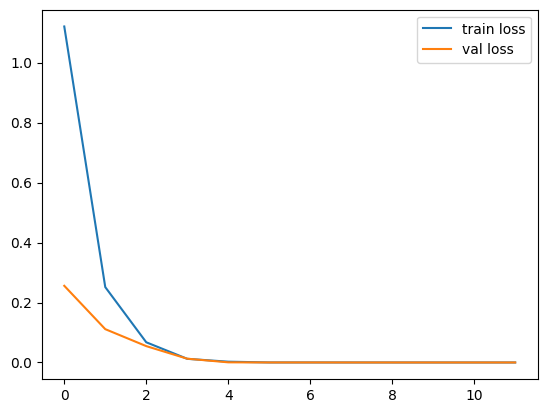

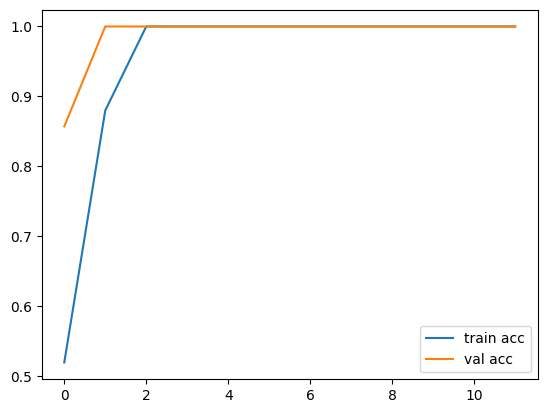

<Figure size 640x480 with 0 Axes>

In [6]:
# plot the loss
plt.plot(model1.history['loss'], label='train loss')
plt.plot(model1.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(model1.history['accuracy'], label='train acc')
plt.plot(model1.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')